### Exploratory Data Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

**Loading the dataset:**

In [3]:
dataset_url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
financial_data = pd.read_csv(dataset_url, sep=' ', header=None,
                             names=[f'atr{i}' for i in range(1, 22)])

**Checking the number of rows and columns:**

In [4]:
financial_data.shape

(1000, 21)

**First five row of the dataset:**

In [5]:
financial_data.head()


,atr1,atr2,atr3,atr4,atr5,atr6,atr7,atr8,atr9,atr10,atr11,atr12,atr13,atr14,atr15,atr16,atr17,atr18,atr19,atr20,atr21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


**verifying the data types of the columns:**

In [6]:
financial_data.dtypes

atr1     object
atr2      int64
atr3     object
atr4     object
atr5      int64
atr6     object
atr7     object
atr8      int64
atr9     object
atr10    object
atr11     int64
atr12    object
atr13     int64
atr14    object
atr15    object
atr16     int64
atr17    object
atr18     int64
atr19    object
atr20    object
atr21     int64
dtype: object

**Verifying if there are any null values:**

In [7]:
financial_data.isna().sum()

atr1     0
atr2     0
atr3     0
atr4     0
atr5     0
atr6     0
atr7     0
atr8     0
atr9     0
atr10    0
atr11    0
atr12    0
atr13    0
atr14    0
atr15    0
atr16    0
atr17    0
atr18    0
atr19    0
atr20    0
atr21    0
dtype: int64

**Distrribution of the response variable:**

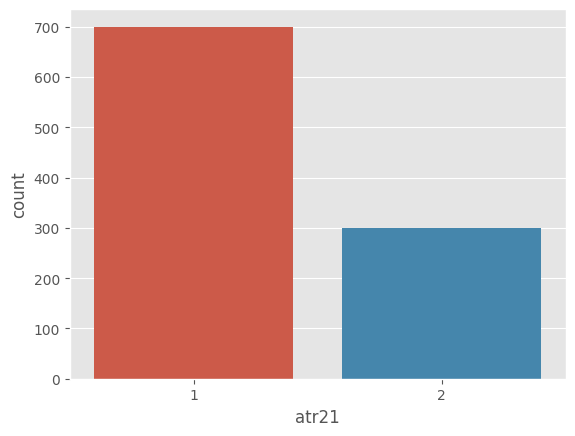

In [8]:
sns.countplot(x='atr21', data=financial_data)
plt.show()

**Relationship between attributes and response variable**

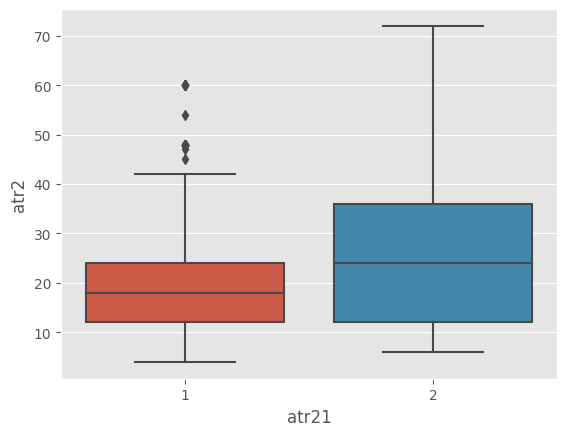

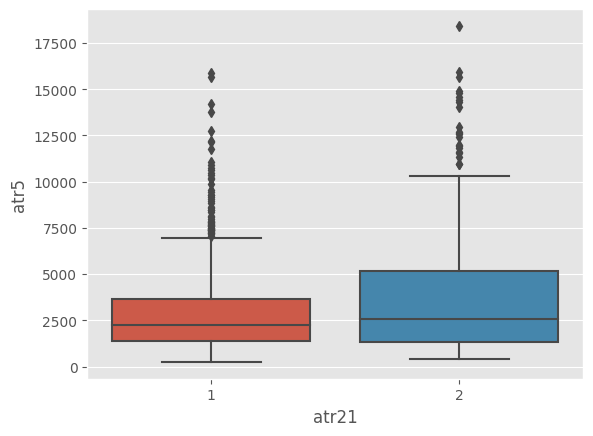

In [12]:

sns.boxplot(x='atr21', y='atr2', data=financial_data)
plt.show()

sns.boxplot(x='atr21', y='atr5', data=financial_data)
plt.show()


# Logistic Regression

In [ ]:
from sklearn import linear_model

**Converting the provided data into numerical format, as the method I will use from the sklearn library only deals with numbers, and applying the necessary data preprocessing treatments.**

In [ ]:
processed_financial_data = financial_data.replace('A', '', regex=True).astype('int')
cols_caracteristicas_financeiras = processed_financial_data.drop(columns=['atr21'])
col_response_variable = processed_financial_data['atr21']

**Using the model itself:**

In [ ]:
modelo_reglog = linear_model.LogisticRegression(solver = 'lbfgs', max_iter=1000)

modelo_reglog.fit(X=cols_caracteristicas_financeiras, y=col_response_variable)

print(modelo_reglog.intercept_)

print(modelo_reglog.coef_)

[0.00290524]
[[-5.90173170e-01  2.58187252e-02 -3.77028079e-01 -2.16920134e-03
   6.03470754e-05 -2.12086691e-01 -1.44841290e-01  2.53610116e-01
  -2.87225353e-01 -1.44227691e-01  2.17295892e-02  1.81345471e-01
  -1.50891852e-02 -2.39073404e-01 -4.82942912e-02  2.63279478e-01
   7.76782363e-02  8.65619250e-02  6.62504969e-02  3.74748404e-01]]


**Comparing the model's results with the actual values using a confusion matrix:**

In [ ]:
previsoes_reglog = modelo_reglog.predict(X=cols_caracteristicas_financeiras)

pd.crosstab(previsoes_reglog, col_response_variable)

atr21,1,2
row_0,,
1,627,162
2,73,138


# The model accuracy is:

In [ ]:
modelo_reglog.score(X=cols_caracteristicas_financeiras, y=col_response_variable)

0.765

# Naive Bayes

The second model I decided to use to compare with logistic regression is Naive Bayes, which is already used in credit analysis.


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
modelo_naive = MultinomialNB()
modelo_naive.fit(cols_caracteristicas_financeiras, col_response_variable)

In [ ]:
previsoes_naive = modelo_naive.predict(X=cols_caracteristicas_financeiras)
pd.crosstab(previsoes_naive, col_response_variable)

atr21,1,2
row_0,,
1,495,181
2,205,119


## The accuracy of the Naive Bayes model:

In [ ]:
modelo_naive.score(X=cols_caracteristicas_financeiras, y=col_response_variable)

0.614

# Conclusion

Based on this small test of the two models, it is possible to see that the logistic regression model has an advantage in terms of higher accuracy. Other factors, such as sensitivity, were not taken into account.